## Finding Arduino Ports
When working with Arduino, it's essential to know which port your Arduino board is connected to on your computer. This is necessary for uploading code and communicating with the board. Each port is identified by a unique name or number, depending on the operating system:

- On Windows, ports are named like `COM3`, `COM4`, etc.
- On macOS and Linux, ports are named like `/dev/ttyUSB0`, `/dev/ttyACM0`, etc.

Run the next cell to know the port number.


In [1]:
import serial.tools.list_ports

def list_all_ports():
    ports = serial.tools.list_ports.comports()

    if not ports:
        print("No serial ports found.")
    else:
        print("Available serial ports:")
        for port in ports:
            print(f"Port: {port.device}, Description: {port.description}")

list_all_ports()

Available serial ports:
Port: COM15, Description: Standard Serial over Bluetooth link (COM15)
Port: COM16, Description: Standard Serial over Bluetooth link (COM16)
Port: COM19, Description: USB Serial Device (COM19)


#### Setup the serial communication with arduino

Change the port value in the next cell with the result that you got in the previous cell

In [3]:
import serial
import time

port = 'COM19' 

ser = serial.Serial(port, 115200)

time.sleep(2)

## Command to pass the read the Transistor data
- Use `m2tran_vds` to step Vgs and sweep vds
- Use `m2tran_vgs` to step Vds and sweep vgs

Note: To read data from 'csv' file rather from real hardware change the `read_data_from_csv` variable to value `1`.

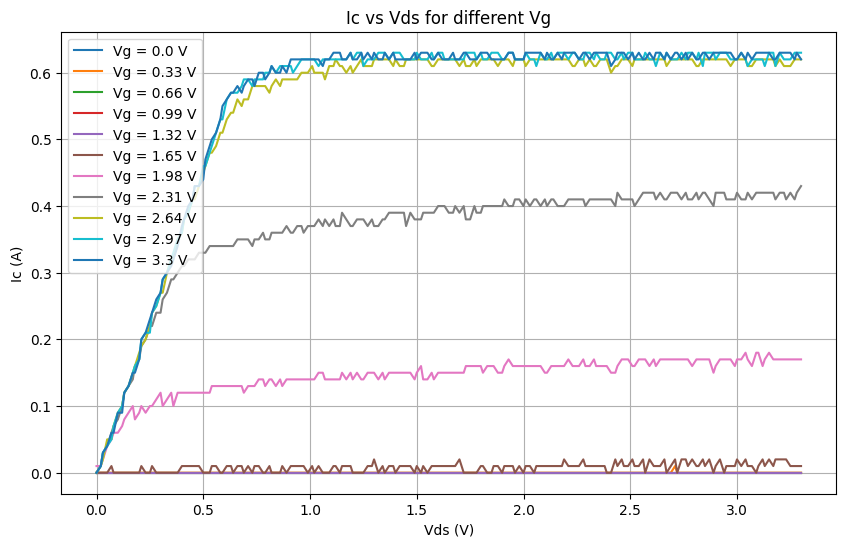

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

read_data_from_csv = 1

# Initialize lists to store the data
gate_voltage = []
drain_voltage = []
channel_current = []

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    if command == 'm2tran_vds':
        # Read data from the serial port until "Ready to enter next command" is found
        gate_voltage = []
        drain_voltage = []
        channel_current = []
        print("Reading data ...", end= "")
        while True:
            print(".", end = "")
            line = ser.readline().decode().strip()
            if "Ready to enter next command" in line:
                break
            # Assuming data is in the format: "Vg,Vds,Ic"
            values = list(line.split(','))
            if len(values) == 3:
                gate_voltage.append(float(values[0]))
                drain_voltage.append(float(values[1]))
                channel_current.append(float(values[2]))
        
        
        # Convert to numpy arrays for easier slicing
        gate_voltage = np.array(gate_voltage)
        drain_voltage = np.array(drain_voltage)
        channel_current = np.array(channel_current)
        
        # Find unique gate voltages
        unique_vg = np.unique(gate_voltage)
        
        # Number of samples for each Vg sweep (e.g., 200)
        num_samples = len(drain_voltage) // len(unique_vg)
        
        # Plot Ic vs Vds for each unique Vg
        plt.figure(figsize=(10, 6))
        
        for vg in unique_vg:
            # Select the corresponding data for this Vg
            mask = gate_voltage == vg
            vds_sweep = drain_voltage[mask]
            ic_sweep = channel_current[mask]
            
            # Plot Vds vs Ic for this Vg
            plt.plot(vds_sweep, ic_sweep, label=f'Vg = {vg} V')
        
        plt.xlabel('Vds (V)')
        plt.ylabel('Ic (A)')
        plt.title('Ic vs Vds for different Vg')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    if command == 'm2tran_vgs':
        # Read data from the serial port until "Ready to enter next command" is found
        gate_voltage = []
        drain_voltage = []
        channel_current = []
        print("Reading data ...", end= "")
        while True:
            print(".", end = "")
            line = ser.readline().decode().strip()
            if "Ready to enter next command" in line:
                break
            # Assuming data is in the format: "Vg,Vds,Ic"
            values = list(line.split(','))
            if len(values) == 3:
                drain_voltage.append(float(values[0]))
                gate_voltage.append(float(values[1]))
                channel_current.append(float(values[2]))
        
        
        # Convert to numpy arrays for easier slicing
        gate_voltage = np.array(gate_voltage)
        drain_voltage = np.array(drain_voltage)
        channel_current = np.array(channel_current)
        
        # Find unique gate voltages
        unique_vd = np.unique(drain_voltage)
        
        # Number of samples for each Vg sweep (e.g., 200)
        num_samples = len(gate_voltage) // len(unique_vd)
        
        # Plot Ic vs Vds for each unique Vg
        plt.figure(figsize=(10, 6))
        
        for vd in unique_vd:
            # Select the corresponding data for this Vg
            mask = drain_voltage == vd
            vgs_sweep = gate_voltage[mask]
            ic_sweep = channel_current[mask]
            
            # Plot Vds vs Ic for this Vg
            plt.plot(vgs_sweep, ic_sweep, label=f'Vd = {vd} V')
        
        plt.xlabel('Vgs (V)')
        plt.ylabel('Ic (A)')
        plt.title('Ic vs Vgs for different Vd')
        plt.legend()
        plt.grid(True)
        plt.show()

else: 
    with open('nmos_data.csv', mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            gate_voltage.append(float(row[0])) 
            drain_voltage.append(float(row[1]))
            channel_current.append(float(row[2]))
            
    # Convert to numpy arrays for easier slicing
    gate_voltage = np.array(gate_voltage)
    drain_voltage = np.array(drain_voltage)
    channel_current = np.array(channel_current)
    
    # Find unique gate voltages
    unique_vg = np.unique(gate_voltage)
    
    # Number of samples for each Vg sweep (e.g., 200)
    num_samples = len(drain_voltage) // len(unique_vg)
    
    # Plot Ic vs Vds for each unique Vg
    plt.figure(figsize=(10, 6))
    
    for vg in unique_vg:
        # Select the corresponding data for this Vg
        mask = gate_voltage == vg
        vds_sweep = drain_voltage[mask]
        ic_sweep = channel_current[mask]
        
        # Plot Vds vs Ic for this Vg
        plt.plot(vds_sweep, ic_sweep, label=f'Vg = {vg} V')
    
    plt.xlabel('Vds (V)')
    plt.ylabel('Ic (A)')
    plt.title('Ic vs Vds for different Vg')
    plt.legend()
    plt.grid(True)
    plt.show()
    

## Curve Fitting
Note: Before running the next cell make sure that scipy is installed. Following is the command to do: `pip install scipy`

Fitted Parameters: k = 1.13216e+00, Vt = 2.25 V


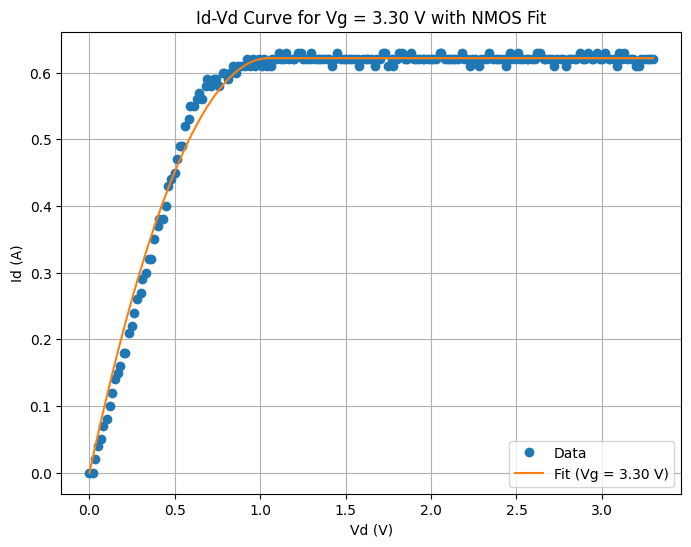

In [42]:
from scipy.optimize import curve_fit

# Function for the triode region (when Vd < Vg - Vt)
def triode(Vd, k, Vt, Vg):
    return k * ((Vg - Vt) * Vd - 0.5 * Vd**2)

# Function for the saturation region (when Vd >= Vg - Vt)
def saturation(Vd, k, Vt, Vg):
    return 0.5 * k * (Vg - Vt)**2 * np.ones_like(Vd)

# Combined NMOS model function
def nmos_model(Vd, k, Vt, Vg):
    Vdsat = Vg - Vt
    Id = np.where(Vd < Vdsat, triode(Vd, k, Vt, Vg), saturation(Vd, k, Vt, Vg))
    return Id

if command == 'm2tran_vds':    
    vg_last = unique_vg[-1]
    mask = gate_voltage == vg_last
    # Vd and Id data for the last block
    Vd_data = drain_voltage[mask]
    Id_data = channel_current[mask]
    
    # Initial guess for fitting parameters: k, Vt
    initial_guess = [1e-5, 0.5]  # Adjust these values based on your dataset
    
    # Perform the curve fitting
    popt, pcov = curve_fit(lambda Vd, k, Vt: nmos_model(Vd, k, Vt, vg_last), Vd_data, Id_data, p0=initial_guess)
    
    # Extract the fitting parameters
    k_fit, Vt_fit = popt
    
    # Print the fitting parameters
    print(f"Fitted Parameters: k = {k_fit:.5e}, Vt = {Vt_fit:.2f} V")
    
    # Generate a smooth range of Vd values for the fitted curve
    Vd_fit = np.linspace(min(Vd_data), max(Vd_data), 1000)
    
    # Generate the fitted Id values using the NMOS model
    Id_fit = nmos_model(Vd_fit, k_fit, Vt_fit, vg_last)
    
    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.plot(Vd_data, Id_data, 'o', label='Data')  # Original data points
    plt.plot(Vd_fit, Id_fit, '-', label=f'Fit (Vg = {vg_last:.2f} V)')  # Fitted curve
    plt.title(f'Id-Vd Curve for Vg = {vg_last:.2f} V with NMOS Fit')
    plt.xlabel('Vd (V)')
    plt.ylabel('Id (A)')
    plt.legend()
    plt.grid(True)
    plt.show()